# **OLAH DATA HEART DISEASE**

**IMPORT DATA AWAL**

In [1]:
import pandas as pd  # Import library pandas lalu inisialisasikan sebagai pd
import numpy as np  # Import library numpy kemudian inisialisasikan sebagai np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

HeartDisease = pd.read_csv('DataAwalSort.csv')  # Input data
HeartDisease  # Menampilkan data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
2,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
3,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
4,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
914,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
915,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
916,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


**PREPROCESSING**

1    508
0    410
Name: Target, dtype: int64


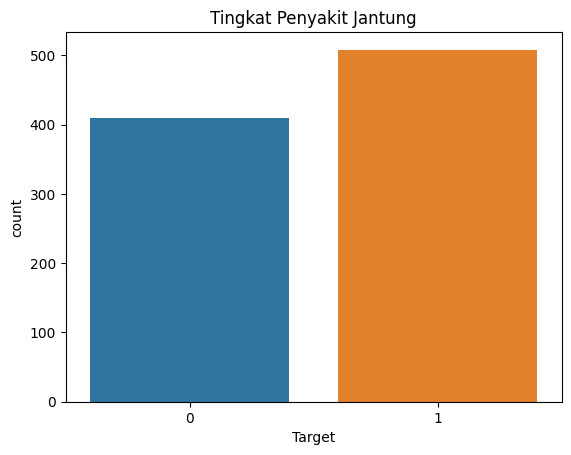

Persentase pasien tidak memiliki penyakit jantung: 44.66%
Persentase pasien memiliki penyakit jantung: 55.34%


In [2]:
print(HeartDisease.Target.value_counts())
plt.title('Tingkat Penyakit Jantung')
sns.countplot(x="Target", data=HeartDisease)
plt.show()
countNoDisease = len(HeartDisease[HeartDisease.Target == 0])
countHaveDisease = len(HeartDisease[HeartDisease.Target == 1])
print("Persentase pasien tidak memiliki penyakit jantung: {:.2f}%".format((countNoDisease / (len(HeartDisease.Target))*100)))
print("Persentase pasien memiliki penyakit jantung: {:.2f}%".format((countHaveDisease / (len(HeartDisease.Target))*100)))

**CEK OUTLIER**

In [3]:
Q1Age = HeartDisease['Age'].quantile(.25) 
Q2Age = np.median(HeartDisease['Age'])
Q3Age = HeartDisease['Age'].quantile(.75)
IQRAge = Q3Age - Q1Age
print("Q1: ", Q1Age)
print("Q2 : ", Q2Age)
print("Q3: ", Q3Age)
print("IQR : ", IQRAge) 
# Menghitung nilai min dan max dari data 
nilai_minAge = np.min(HeartDisease['Age'])
nilai_maxAge = np.max(HeartDisease['Age'])
print("Data min : ", nilai_minAge)
print("Data max : ", nilai_maxAge)
# Hitung IQR minimum dan maksmim
min_IQRAge = Q1Age - 1.5 * IQRAge
max_IQRAge = Q3Age + 1.5 * IQRAge 
print("IQR min :", min_IQRAge)
print("IQR max : ",max_IQRAge)
#Outlier
if (nilai_minAge < min_IQRAge):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  
if (nilai_maxAge > max_IQRAge):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')
low_out = []
high_out = []
for i in HeartDisease['Age']:
    if (i < min_IQRAge):
        low_out.append(i)
    if (i > max_IQRAge):
        high_out.append(i)
print('Low outlier : ', low_out)
print('High outlier : ', high_out)

#Cek uk baris dan kolom sebelum data yang outlier dibuang
print("Shape awal atribut Age  : ", HeartDisease['Age'].shape)
HeartDiseaseAge = HeartDisease[~((HeartDisease['Age'] < (Q1Age - 1.5 * IQRAge)) | (HeartDisease['Age'] > (Q3Age + 1.5 * IQRAge)))]
#cek uk setelah data dibuang
print('Shape akhir atribut Age : ', HeartDiseaseAge.shape)

Q1:  47.0
Q2 :  54.0
Q3:  60.0
IQR :  13.0
Data min :  28
Data max :  77
IQR min : 27.5
IQR max :  79.5
Tidak ditemukan low outlier!
Tidak ditemukan high outlier!
Low outlier :  []
High outlier :  []
Shape awal atribut Age  :  (918,)
Shape akhir atribut Age :  (918, 12)


In [4]:
# Cek IQR
Q1rbp = HeartDisease['RestingBP'].quantile(0.25)
Q3rbp = HeartDisease['RestingBP'].quantile(0.75)
IQrbp = Q3rbp - Q1rbp
print(IQrbp)
#Cek uk baris dan kolom sebelum data yang outlier dibuang
print("Shape awal atribut RestingBP  : ", HeartDisease['RestingBP'].shape)
#removing outlier
HeartDiseaseRBP = HeartDiseaseAge[~((HeartDiseaseAge['RestingBP'] < (Q1rbp - 1.5 * IQrbp)) | (HeartDiseaseAge['RestingBP'] > (Q3rbp+ 1.5 * IQrbp)))]
#cek uk setelah data dibuang
print('Shape akhir atribut RestingBP : ', HeartDiseaseRBP.shape)

20.0
Shape awal atribut RestingBP  :  (918,)
Shape akhir atribut RestingBP :  (890, 12)


In [5]:
# Cek IQR
Q1Cholesterol = HeartDisease['Cholesterol'].quantile(0.25)
Q3Cholesterol = HeartDisease['Cholesterol'].quantile(0.75)
IQRCholesterol = Q3Cholesterol - Q1Cholesterol
print(IQRCholesterol)
#Cek uk baris dan kolom sebelum data yang outlier dibuang
print("Shape awal atribut Cholesterol  : ", HeartDisease['Cholesterol'].shape)
#removing outlier
HeartDiseaseCholesterol = HeartDiseaseRBP[~((HeartDiseaseRBP['Cholesterol'] < (Q1Cholesterol  - 1.5 * IQRCholesterol)) | (HeartDiseaseRBP['Cholesterol'] > (Q3Cholesterol + 1.5 * IQRCholesterol)))]
#cek uk setelah data dibuang
print('Shape akhir atribut Cholesterol : ', HeartDiseaseCholesterol.shape)

93.75
Shape awal atribut Cholesterol  :  (918,)
Shape akhir atribut Cholesterol :  (715, 12)


In [6]:
# Cek IQR
Q1MaxHR = HeartDisease['MaxHR'].quantile(0.25)
Q3MaxHR = HeartDisease['MaxHR'].quantile(0.75)
IQRMaxHR = Q3MaxHR - Q1MaxHR
print(IQRMaxHR)
#Cek uk baris dan kolom sebelum data yang outlier dibuang
print("Shape awal atribut MaxHR  : ", HeartDisease['MaxHR'].shape)
#removing outlier
HeartDiseaseMaxHR = HeartDiseaseCholesterol[~((HeartDiseaseCholesterol['MaxHR'] < (Q1MaxHR  - 1.5 * IQRMaxHR)) | (HeartDiseaseCholesterol['MaxHR'] > (Q3MaxHR + 1.5 * IQRMaxHR)))]
#cek uk setelah data dibuang
print('Shape akhir atribut MaxHR : ', HeartDiseaseMaxHR.shape)

36.0
Shape awal atribut MaxHR  :  (918,)
Shape akhir atribut MaxHR :  (715, 12)


In [7]:
# Cek IQR
Q1Oldpeak = HeartDisease['Oldpeak'].quantile(0.25)
Q3Oldpeak = HeartDisease['Oldpeak'].quantile(0.75)
IQROldpeak = Q3Oldpeak - Q1Oldpeak
print(IQROldpeak)
#Cek uk baris dan kolom sebelum data yang outlier dibuang
print("Shape awal atribut Oldpeak  : ", HeartDisease['Oldpeak'].shape)
#removing outlier
HeartDiseaseOldpeak = HeartDiseaseMaxHR[~((HeartDiseaseMaxHR['Oldpeak'] < (Q1Oldpeak - 1.5 * IQROldpeak)) | (HeartDiseaseMaxHR['Oldpeak'] > (Q3Oldpeak + 1.5 * IQROldpeak)))]
#cek uk setelah data dibuang
print('Shape akhir atribut Oldpeak : ', HeartDiseaseOldpeak.shape)

1.5
Shape awal atribut Oldpeak  :  (918,)
Shape akhir atribut Oldpeak :  (702, 12)


In [8]:
#Mengecek apakah ada data yang kosong? Jika False artinya tidak terdapat data yang kosong 
HeartDisease.empty

False

**CEK MISSING VALUE**

In [9]:
HeartDisease.isna() #berfungsi pengecekan apakah ada missing value
HeartDisease.notna() #berfungsi pengecekan tidak adanya missing value

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,True,True,True,True,True,True,True,True,True,True,True
914,True,True,True,True,True,True,True,True,True,True,True,True
915,True,True,True,True,True,True,True,True,True,True,True,True
916,True,True,True,True,True,True,True,True,True,True,True,True


In [10]:
HeartDisease.isna().sum() #melihat jumlah data yang terdapat missing value pada tiap atribut

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
Target            0
dtype: int64

**MENAMPILKAN INFORMASI KETERANGAN DATA PADA TIAP ATRIBUT**

In [11]:
HeartDisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  Target          918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**TRANSFORMASI DATA CATEGORIAL / OBJECT**

In [12]:
HeartDisease['Sex'] = HeartDisease['Sex'].astype('category')
HeartDisease['Sex'] = HeartDisease['Sex'].cat.codes

HeartDisease['ChestPainType'] = HeartDisease['ChestPainType'].astype('category')
HeartDisease['ChestPainType'] = HeartDisease['ChestPainType'].cat.codes

HeartDisease['FastingBS'] = HeartDisease['FastingBS'].astype('category')
HeartDisease['FastingBS'] = HeartDisease['FastingBS'].cat.codes

HeartDisease['RestingECG'] = HeartDisease['RestingECG'].astype('category')
HeartDisease['RestingECG'] = HeartDisease['RestingECG'].cat.codes

HeartDisease['ExerciseAngina'] = HeartDisease['ExerciseAngina'].astype('category')
HeartDisease['ExerciseAngina'] = HeartDisease['ExerciseAngina'].cat.codes

HeartDisease['ST_Slope'] = HeartDisease['ST_Slope'].astype('category')
HeartDisease['ST_Slope'] = HeartDisease['ST_Slope'].cat.codes

HeartDisease['Target'] = HeartDisease['Target'].astype('category')
HeartDisease['Target'] = HeartDisease['Target'].cat.codes

**NORMALISASI DATA NUMERIK / INTEGER**

In [13]:
def MINMAX(x, XminB, XmaxB):
  min=np.min(x)
  max=np.max(x)

  for a in x:
    XB = ((x-min)/(max-min))*(XmaxB+XminB)
    return XB

cols_to_norm = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR','Oldpeak']
HeartDisease[cols_to_norm] = HeartDisease[cols_to_norm].apply(lambda x: MINMAX(x,0,1))
HeartDisease[cols_to_norm]

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,0.244898,0.70,0.479270,0.788732,0.295455
1,0.183673,0.65,0.469320,0.267606,0.295455
2,0.530612,0.75,0.323383,0.436620,0.295455
3,0.224490,0.60,0.562189,0.774648,0.295455
4,0.346939,0.65,0.393035,0.774648,0.295455
...,...,...,...,...,...
913,0.591837,0.70,0.399668,0.443662,0.318182
914,0.346939,0.55,0.437811,0.507042,0.431818
915,0.816327,0.72,0.320066,0.570423,0.681818
916,0.591837,0.65,0.217247,0.387324,0.431818


**MENAMPILKAN DATA HEART DISEASE SETELAH MELAKUKAN TRANSFORMASI DAN NORMALISASI**

In [14]:
HeartDisease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,0.244898,1,1,0.70,0.479270,0,1,0.788732,0,0.295455,2,0
1,0.183673,1,1,0.65,0.469320,0,2,0.267606,0,0.295455,2,0
2,0.530612,1,2,0.75,0.323383,0,1,0.436620,0,0.295455,2,0
3,0.224490,1,2,0.60,0.562189,0,1,0.774648,0,0.295455,2,0
4,0.346939,0,1,0.65,0.393035,0,1,0.774648,0,0.295455,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.591837,0,0,0.70,0.399668,0,1,0.443662,1,0.318182,1,1
914,0.346939,1,3,0.55,0.437811,0,1,0.507042,0,0.431818,1,1
915,0.816327,1,0,0.72,0.320066,1,1,0.570423,0,0.681818,1,1
916,0.591837,1,0,0.65,0.217247,0,1,0.387324,1,0.431818,1,1


**EXPORT DATA YANG TELAH DIOLAH**

In [15]:
# HeartDisease.to_csv('DataAwalSort.csv', index=False)

**R-SQUARE**

In [16]:
HeartDisease.sum()

Age                477.938776
Sex                725.000000
ChestPainType      717.000000
RestingBP          607.700000
Cholesterol        302.650083
FastingBS          214.000000
RestingECG         908.000000
MaxHR              496.556338
ExerciseAngina     371.000000
Oldpeak            363.795455
ST_Slope          1250.000000
Target             508.000000
dtype: float64

In [17]:
from cmath import sqrt

# yy = HeartDisease['Target']
# yy
# # y = HeartDisease['Target'].sum()
# # y2 = (HeartDisease['Target'] * HeartDisease['Target']).sum()
# # x_Age = HeartDisease['Age']

# # xy_Age = (x_Age * yy).sum()
# # xAge = HeartDisease['Age'].sum()
# # x2_Age = (HeartDisease['Age'] * HeartDisease['Age']).sum()

# # r1_Age = 918 * xy_Age - xAge * y
# # r2_Age = (918 * x2_Age - (xAge * xAge))
# # r3_Age = (918 * y2 - (y * y))
# # r4_Age = sqrt(r2_Age) * sqrt(r3_Age)
# # r_age = r1_Age / r4_Age
# # R_age = r_age * r_age

# # --------------------------------------------------------------------------
# x_sex = HeartDisease['Sex']
# xy_Sex = (x_sex * yy).sum()
# xSex = HeartDisease['Sex'].sum()
# x2_Sex = (HeartDisease['Sex'] * HeartDisease['Sex']).sum()

# r1_Sex = 918 * xy_Sex - xSex * y
# r2_Sex = (918 * x2_Sex - (xSex * xSex))
# r3_Sex = (918 * y2 - (y * y))
# r4_Sex = sqrt(r2_Sex) * sqrt(r3_Sex)
# r_Sex = r1_Sex / r4_Sex
# R_sex = r_Sex * r_Sex

# # -----------------------------------------------------------------------------
# x_cpt = HeartDisease['ChestPainType']
# xy_cpt = (x_cpt * yy).sum()
# xCPT = HeartDisease['ChestPainType'].sum()
# x2_cpt = (HeartDisease['ChestPainType'] * HeartDisease['ChestPainType']).sum()

# r1_cpt = 918 * xy_cpt - xCPT * y
# r2_cpt = (918 * x2_cpt - (xCPT * xCPT))
# r3_cpt = (918 * y2 - (y * y))
# r4_cpt = sqrt(r2_cpt) * sqrt(r3_cpt)
# r_cpt = r1_cpt / r4_cpt
# R_cpt = r_cpt * r_cpt

# #------------------------------------------------------------------------------
# x_rbp = HeartDisease['RestingBP']
# xy_rbp = (x_rbp * yy).sum()
# xRBP = HeartDisease['RestingBP'].sum()
# x2_rbp = (HeartDisease['RestingBP'] * HeartDisease['RestingBP']).sum()

# r1_rbp = 918 * xy_rbp - xRBP * y
# r2_rbp = 918 * x2_rbp - xRBP * xRBP
# r3_rbp = 918 * y2 - y * y
# r4_rbp = sqrt(r2_rbp) * sqrt(r3_rbp)
# r_rbp = r1_rbp / r4_rbp
# R_rbp = r_rbp * r_rbp

# #-----------------------------------------------------------------------------
# x_chl = HeartDisease['Cholesterol']
# xy_chl = (x_chl * yy).sum()
# xCHL = HeartDisease['Cholesterol'].sum()
# x2_chl = (HeartDisease['Cholesterol'] * HeartDisease['Cholesterol']).sum()

# r1_chl = 918 * xy_chl - xCHL * y
# r2_chl = 918 * x2_chl - xCHL * xCHL
# r3_chl = 918 * y2 - y * y
# r4_chl = sqrt(r2_chl) * sqrt(r3_chl)
# r_chl = r1_chl / r4_chl
# R_chl = r_chl * r_chl

# #-----------------------------------------------------------------------------
# x_fbs = HeartDisease['FastingBS']
# xy_fbs = (x_fbs * yy).sum()
# xFBS = HeartDisease['FastingBS'].sum()
# x2_fbs = (HeartDisease['FastingBS'] * HeartDisease['FastingBS']).sum()

# r1_fbs = 918 * xy_fbs - xFBS * y
# r2_fbs = 918 * x2_fbs - xFBS * xFBS
# r3_fbs = 918 * y2 - y * y
# r4_fbs = sqrt(r2_fbs) * sqrt(r3_fbs)
# r_fbs = r1_fbs / r4_fbs
# R_fbs = r_fbs * r_fbs

# #-----------------------------------------------------------------------------
# x_recg = HeartDisease['RestingECG']
# xy_recg = (x_recg * yy).sum()
# xRECG = HeartDisease['RestingECG'].sum()
# x2_recg = (HeartDisease['RestingECG'] * HeartDisease['RestingECG']).sum()

# r1_recg = 918 * xy_recg - xRECG * y
# r2_recg = 918 * x2_recg - xRECG * xRECG
# r3_recg = 918 * y2 - y * y
# r4_recg = sqrt(r2_recg) * sqrt(r3_recg)
# r_recg = r1_recg / r4_recg
# R_recg = r_recg * r_recg

# #-----------------------------------------------------------------------------
# x_mhr = HeartDisease['MaxHR']
# xy_mhr = (x_mhr * yy).sum()
# xMaxHR = HeartDisease['MaxHR'].sum()
# x2_mhr = (HeartDisease['MaxHR'] * HeartDisease['MaxHR']).sum()

# r1_mhr = 918 * xy_mhr - xMaxHR * y
# r2_mhr = 918 * x2_mhr - xMaxHR * xMaxHR
# r3_mhr = 918 * y2 - y * y
# r4_mhr = sqrt(r2_mhr) * sqrt(r3_mhr)
# r_mhr = r1_mhr / r4_mhr
# R_mhr = r_mhr * r_mhr

# #-----------------------------------------------------------------------------
# x_ea = HeartDisease['ExerciseAngina']
# xy_ea = (x_ea * yy).sum()
# xEA = HeartDisease['ExerciseAngina'].sum()
# x2_ea = (HeartDisease['ExerciseAngina'] * HeartDisease['ExerciseAngina']).sum()

# r1_ea = 918 * xy_ea - xEA * y
# r2_ea = 918 * x2_ea - xEA * xEA
# r3_ea = 918 * y2 - y * y
# r4_ea = sqrt(r2_ea) * sqrt(r3_ea)
# r_ea = r1_ea / r4_ea
# R_ea = r_ea * r_ea

# #-----------------------------------------------------------------------------
# x_op = HeartDisease['Oldpeak']
# xy_op = (x_op * yy).sum()
# xOP = HeartDisease['Oldpeak'].sum()
# x2_op = (HeartDisease['Oldpeak'] * HeartDisease['Oldpeak']).sum()

# r1_op = 918 * xy_op - xOP * y
# r2_op = 918 * x2_op - xOP * xOP
# r3_op = 918 * y2 - y * y
# r4_op = sqrt(r2_op) * sqrt(r3_op)
# r_op = r1_op / r4_op
# R_op = r_op * r_op

# # ----------------------------------------------------------------------------
# x_st = HeartDisease['ST_Slope']
# xy_st = (x_st * yy).sum()
# xST = HeartDisease['ST_Slope'].sum()
# x2_st = (HeartDisease['ST_Slope'] * HeartDisease['ST_Slope']).sum()

# r1_st = 918 * xy_st - xST * y
# r2_st = 918 * x2_st - xST * xST
# r3_st = 918 * y2 - y * y
# r3_st
# # r4_st = sqrt(r2_st) * sqrt(r3_st)
# # r_st = r1_st / r4_st
# # R_st = r_st * r_st


# #-----------------------------------------------------------
# print("Nilai Korelasi R-Square atribut Age           : ",R_age)
# print("Nilai Korelasi R-Square atribut Sex           : ", R_sex)
# print("Nilai Korelasi R-Square atribut ChestPainType : ", R_cpt)
# print("Nilai Korelasi R-Square atribut RestingBP     : ", R_rbp)
# print("Nilai Korelasi R-Square atribut Cholesterol   : ", R_chl)
# print("Nilai Korelasi R-Square atribut FastingBS     : ", R_fbs)
# print("Nilai Korelasi R-Square atribut RestingECG    : ", R_recg)
# print("Nilai Korelasi R-Square atribut MaxHR         : ", R_mhr)
# print("Nilai Korelasi R-Square atribut ExerciseAngina: ", R_ea)
# print("Nilai Korelasi R-Square atribut Oldpeak       : ", R_op)
# print("Nilai Korelasi R-Square atribut ST_Slope      : ", R_st)
# dt = {'dataage' :R_age, 'datasex' :R_sex, 'datacpt' :R_cpt, 'datarbp' :R_rbp, 'datachl' :R_chl, 'datafbs' :R_fbs, 'datarecg' :R_recg, 'datamhr' :R_mhr, 'dataea' :R_ea, 'dataop' :R_op, 'datast' :R_st}
# print(dt)

In [18]:
result_dt = {'Age':R_age, 'Sex':R_sex, 'ChestPainType':R_cpt, 'RestingBP':R_rbp, 'Cholesterol':R_chl, 'FastingBS':R_fbs, 'RestingECG':R_recg, 'MaxHR':R_mhr, 'ExerciseAngina':R_ea, 'Oldpeak':R_op, 'ST_Slope':R_st}

NameError: name 'R_age' is not defined

In [ ]:
# import operator
# dt = dict(sorted(dt.items(), key=operator.itemgetter(1)))
# print(dt)

In [ ]:
# dt = pd.DataFrame(dt, index=[0])
# dt.head()

**PROBABILITAS CORRELATED NAIVE BAYES** 

**NORMALISASI DATA NUMERIK MENJADI DUA DESIMAL / DUA DIBELAKANG KOMA**

Normalisasi diubah menjadi dua angka dibelakang koma agar pada saat perhitungan probabilitas correlated naive bayes data yang dihitung tidak memiliki banyak jumlah.

In [ ]:
# def MINMAX(x, XminB, XmaxB):
#   min=np.min(x)
#   max=np.max(x)

#   for a in x:
#     XB = ((x-min)/(max-min))*(XmaxB+XminB)
#     return XB

# cols_to_norm = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR','Oldpeak']
# HeartDisease[cols_to_norm] = (round(HeartDisease[cols_to_norm].apply(lambda x: MINMAX(x,0,1)), 2))
# HeartDisease[cols_to_norm]

**MENAMPILKAN DATA TIAP ATRIBUT PADA LABEL YANG TIDAK TERINFEKSI PENYAKIT JANTUNG**

In [ ]:
df_notInfected = HeartDisease[HeartDisease['Target'] == 0]
print(df_notInfected)

          Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0    0.244898    1              1       0.70     0.479270          0   
1    0.183673    1              1       0.65     0.469320          0   
2    0.530612    1              2       0.75     0.323383          0   
3    0.224490    1              2       0.60     0.562189          0   
4    0.346939    0              1       0.65     0.393035          0   
..        ...  ...            ...        ...          ...        ...   
405  0.571429    1              1       0.65     0.366501          0   
406  0.571429    1              1       0.60     0.398010          0   
407  0.551020    0              1       0.66     0.567164          0   
408  0.265306    1              1       0.60     0.260365          0   
409  0.204082    1              2       0.69     0.290216          0   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  Target  
0             1  0.788732               0  0.295455         2  

**MENAMPILKAN DATA TIAP ATRIBUT PADA LABEL YANG TERINFEKSI PENYAKIT JANTUNG**

In [ ]:
# to select rows whose coloumn equals a scala
df_infected = HeartDisease[HeartDisease['Target'] == 1]
print(df_infected)

          Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
410  0.428571    0              2       0.80     0.298507          0   
411  0.408163    0              0       0.69     0.354892          0   
412  0.183673    1              0       0.70     0.343284          0   
413  0.612245    1              1       0.68     0.271973          0   
414  0.428571    1              0       0.70     0.388060          0   
..        ...  ...            ...        ...          ...        ...   
913  0.591837    0              0       0.70     0.399668          0   
914  0.346939    1              3       0.55     0.437811          0   
915  0.816327    1              0       0.72     0.320066          1   
916  0.591837    1              0       0.65     0.217247          0   
917  0.591837    0              1       0.65     0.391376          0   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  Target  
410           1  0.676056               0  0.409091         1  

In [ ]:
yy = df_infected['Target']
y = df_infected['Target'].sum()
y2 = (df_infected['Target'] * df_infected['Target']).sum()

x_st = df_infected['ST_Slope']
xy_st = (x_st * yy).sum()
xST = df_infected['ST_Slope'].sum()
x2_st = (df_infected['ST_Slope'] * df_infected['ST_Slope']).sum()

r1_st = 508 * xy_st - xST * y
r2_st = 508 * x2_st - xST * xST
r3_st = 508 * y2 - y * y
r4_st = sqrt(r2_st) * sqrt(r3_st)
r_st = r1_st / r4_st
R_st = r_st * r_st
print(R_st)

KeyError: 'Target'

* **PRIOR PROBABILITY**

In [ ]:
list_kelas = np.unique(HeartDisease['Target'])
list_prior = np.zeros(len(list_kelas))
jumlah_instance = len(HeartDisease)

i = 0
while i < len(list_kelas):
    kelas_cek = list_kelas[i]
    j = 0
    jumlah_kelas_muncul = 0
    while j < jumlah_instance:
        kelas_tercek = HeartDisease['Target'].iloc[j]
        if kelas_cek == kelas_tercek:
            jumlah_kelas_muncul += 1
        j += 1
    prior_prob = jumlah_kelas_muncul / jumlah_instance
    list_prior[i] = prior_prob
    i += 1
print("Menampilkan Prior Probability No  : " , list_prior[0])
print("Menampilkan Prior Probability Yes : " , list_prior[1])

Menampilkan Prior Probability No  :  0.4466230936819172
Menampilkan Prior Probability Yes :  0.5533769063180828


* **PROBABILITAS INDEPENDEN KELAS Y DARI SEMUA FITUR KELAS X**

**MENAMPILKAN JUMLAH DATA ATRIBUT AGE PADA LABEL TIDAK TERINFEKSI PENYAKIT JANTUNG**

In [ ]:
target0 = HeartDisease[HeartDisease['Target'] == 0]
target_0 = pd.value_counts(target0.Age)
df_notInfected = pd.DataFrame(target_0)
df_notInfected = df_notInfected.reset_index()
df_notInfected.columns = ['Age', 'JumlahTarget_0']
# print(df_notInfected)

In [ ]:
age_ls = []
for w in df_notInfected.JumlahTarget_0:
    x = (w + 1)/countNoDisease
    ls.append(x)
print(ls)

[0.5975609756097561, 0.06585365853658537, 0.046341463414634146, 0.036585365853658534, 0.02926829268292683, 0.026829268292682926, 0.024390243902439025, 0.024390243902439025, 0.02195121951219512, 0.02195121951219512, 0.02195121951219512, 0.01951219512195122, 0.01951219512195122, 0.01707317073170732, 0.00975609756097561, 0.00975609756097561, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.24606299212598426, 0.12401574803149606, 0.12007874015748031, 0.08464566929133858, 0.051181102362204724, 0.03937007874015748, 0.03346456692913386, 0.02952755905511811, 0.025590551181102362, 0.025590551181102362, 0.017716535433070866, 0.017716535433070866, 0.017716535433070866, 0.015748031496062992, 0.013779527559055118, 0.013779527559055118, 0.011811023622047244, 0.0118

In [ ]:
target1 = HeartDisease[HeartDisease['Target'] == 1]
target_1 = pd.value_counts(target1.Age)
df_infected = pd.DataFrame(target_1)
df_infected = df_infected.reset_index()
df_infected.columns = ['Age', 'JumlahTarget_1']
print(df_infected)

         Age  JumlahTarget_1
0   0.612245              28
1   0.591837              26
2   0.673469              26
3   0.571429              25
4   0.693878              25
5   0.551020              24
6   0.653061              24
7   0.632653              23
8   0.530612              23
9   0.714286              23
10  0.489796              19
11  0.510204              15
12  0.734694              15
13  0.755102              15
14  0.469388              15
15  0.408163              15
16  0.448980              14
17  0.367347              13
18  0.795918              12
19  0.428571              11
20  0.387755              11
21  0.204082              11
22  0.306122              11
23  0.836735              10
24  0.775510               7
25  0.857143               6
26  0.265306               6
27  0.816327               6
28  0.244898               6
29  0.326531               6
30  0.938776               5
31  0.142857               4
32  0.285714               3
33  0.897959  

In [ ]:
_ls = []
for w in df_infected.JumlahTarget_1:
    x = (w + 1)/countHaveDisease
    ls.append(x)
print(ls)

[0.5975609756097561, 0.06585365853658537, 0.046341463414634146, 0.036585365853658534, 0.02926829268292683, 0.026829268292682926, 0.024390243902439025, 0.024390243902439025, 0.02195121951219512, 0.02195121951219512, 0.02195121951219512, 0.01951219512195122, 0.01951219512195122, 0.01707317073170732, 0.00975609756097561, 0.00975609756097561, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.24606299212598426, 0.12401574803149606, 0.12007874015748031, 0.08464566929133858, 0.051181102362204724, 0.03937007874015748, 0.03346456692913386, 0.02952755905511811, 0.025590551181102362, 0.025590551181102362, 0.017716535433070866, 0.017716535433070866, 0.017716535433070866, 0.015748031496062992, 0.013779527559055118, 0.013779527559055118, 0.011811023622047244, 0.0118

**MENAMPILKAN JUMLAH DATA ATRIBUT SEX PADA LABEL TIDAK TERINFEKSI & TERINFEKSI PENYAKIT JANTUNG**

In [ ]:
target0 = HeartDisease[HeartDisease['Target'] == 0]
target_0 = pd.value_counts(target0.Sex)
df_notInfected = pd.DataFrame(target_0)
df_notInfected = df_notInfected.reset_index()
df_notInfected.columns = ['Sex', 'JumlahTarget_0']
# print(df_notInfected)

In [ ]:
sex_ls = []
for w in df_notInfected.JumlahTarget_0:
    x = (w + 1)/countNoDisease
    ls.append(x)
print(ls)

[0.5975609756097561, 0.06585365853658537, 0.046341463414634146, 0.036585365853658534, 0.02926829268292683, 0.026829268292682926, 0.024390243902439025, 0.024390243902439025, 0.02195121951219512, 0.02195121951219512, 0.02195121951219512, 0.01951219512195122, 0.01951219512195122, 0.01707317073170732, 0.00975609756097561, 0.00975609756097561, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.24606299212598426, 0.12401574803149606, 0.12007874015748031, 0.08464566929133858, 0.051181102362204724, 0.03937007874015748, 0.03346456692913386, 0.02952755905511811, 0.025590551181102362, 0.025590551181102362, 0.017716535433070866, 0.017716535433070866, 0.017716535433070866, 0.015748031496062992, 0.013779527559055118, 0.013779527559055118, 0.011811023622047244, 0.0118

In [ ]:
target1 = HeartDisease[HeartDisease['Target'] == 1]
target_1 = pd.value_counts(target1.Sex)
df_infected = pd.DataFrame(target_1)
df_infected = df_infected.reset_index()
df_infected.columns = ['Sex', 'JumlahTarget_1']
# print(df_infected)

In [ ]:
ls = []
for w in df_infected.JumlahTarget_1:
    x = (w + 1)/countHaveDisease
    ls.append(x)
print(ls)

[0.9035433070866141, 0.10039370078740158]


**MENAMPILKAN JUMLAH DATA ATRIBUT CHESTPAIN TYPE PADA LABEL TIDAK TERINFEKSI PENYAKIT JANTUNG**

In [ ]:
target0 = HeartDisease[HeartDisease['Target'] == 0]
target_0 = pd.value_counts(target0.ChestPainType)
df_notInfected = pd.DataFrame(target_0)
df_notInfected = df_notInfected.reset_index()
df_notInfected.columns = ['ChestPainType', 'JumlahTarget_0']
# print(df_notInfected)

In [ ]:
ChestPainType_ls = []
for w in df_notInfected.JumlahTarget_0:
    x = (w + 1)/countNoDisease
    ls.append(x)
print(ls)

[0.9035433070866141, 0.10039370078740158, 0.36585365853658536, 0.32195121951219513, 0.25609756097560976, 0.06585365853658537]


In [ ]:
target1 = HeartDisease[HeartDisease['Target'] == 1]
target_1 = pd.value_counts(target1.ChestPainType)
df_infected = pd.DataFrame(target_1)
df_infected = df_infected.reset_index()
df_infected.columns = ['ChestPainType', 'JumlahTarget_1']
print(df_infected)

   ChestPainType  JumlahTarget_1
0              0             392
1              2              72
2              1              24
3              3              20


In [ ]:
ls = []
for w in df_infected.JumlahTarget_1:
    x = (w + 1)/countHaveDisease
    ls.append(x)
print(ls)

[0.7736220472440944, 0.1437007874015748, 0.04921259842519685, 0.04133858267716536]


**MENAMPILKAN JUMLAH DATA ATRIBUT RESTING BP PADA LABEL TIDAK TERINFEKSI PENYAKIT JANTUNG**

In [ ]:
target0 = HeartDisease[HeartDisease['Target'] == 0]
target_0 = pd.value_counts(target0.RestingBP)
df_notInfected = pd.DataFrame(target_0)
df_notInfected = df_notInfected.reset_index()
df_notInfected.columns = ['RestingBP', 'JumlahTarget_0']
# print(df_notInfected)

In [ ]:
RestingBP_ls = []
for w in df_notInfected.JumlahTarget_0:
    x = (w + 1)/countNoDisease
    ls.append(x)
print(ls)

[0.7736220472440944, 0.1437007874015748, 0.04921259842519685, 0.04133858267716536, 0.1902439024390244, 0.16341463414634147, 0.12926829268292683, 0.06585365853658537, 0.06341463414634146, 0.041463414634146344, 0.026829268292682926, 0.026829268292682926, 0.026829268292682926, 0.02195121951219512, 0.02195121951219512, 0.01951219512195122, 0.01951219512195122, 0.01707317073170732, 0.01707317073170732, 0.014634146341463415, 0.014634146341463415, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.00975609756097561, 0.00975609756097561, 0.00975609756097561, 0.00975609756097561, 0.00975609756097561, 0.00975609756097561, 0.00975609756097561, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.0048780487

In [ ]:
target1 = HeartDisease[HeartDisease['Target'] == 1]
target_1 = pd.value_counts(target1.RestingBP)
df_infected = pd.DataFrame(target_1)
df_infected = df_infected.reset_index()
df_infected.columns = ['RestingBP', 'JumlahTarget_1']
# print(df_infected)

In [ ]:
ls = []
for w in df_infected.JumlahTarget_1:
    x = (w + 1)/countHaveDisease
    ls.append(x)
print(ls)

[0.11023622047244094, 0.11023622047244094, 0.10433070866141732, 0.0688976377952756, 0.06496062992125984, 0.0610236220472441, 0.03937007874015748, 0.031496062992125984, 0.031496062992125984, 0.025590551181102362, 0.023622047244094488, 0.023622047244094488, 0.021653543307086614, 0.017716535433070866, 0.017716535433070866, 0.015748031496062992, 0.015748031496062992, 0.015748031496062992, 0.015748031496062992, 0.015748031496062992, 0.015748031496062992, 0.015748031496062992, 0.013779527559055118, 0.013779527559055118, 0.011811023622047244, 0.011811023622047244, 0.011811023622047244, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.005905511811023622, 0.005905511811023622, 0.005905511811023622, 0.005905511811023622, 0.005905511811023622, 0.005905511811023622, 0.003937007874015748, 0.003937007874015748, 0.003937007874015748, 0

**MENAMPILKAN JUMLAH DATA ATRIBUT CHOLESTEROL PADA LABEL TIDAK TERINFEKSI  & TERINFEKSI PENYAKIT JANTUNG**

In [ ]:
target0 = HeartDisease[HeartDisease['Target'] == 0]
target_0 = pd.value_counts(target0.Cholesterol)
df_notInfected = pd.DataFrame(target_0)
df_notInfected = df_notInfected.reset_index()
df_notInfected.columns = ['Cholesterol', 'JumlahTarget_0']
# print(df_notInfected)

In [ ]:
Cholesterol_ls = []
for w in df_notInfected.JumlahTarget_0:
    x = (w + 1)/countNoDisease
    ls.append(x)
print(ls)

[0.11023622047244094, 0.11023622047244094, 0.10433070866141732, 0.0688976377952756, 0.06496062992125984, 0.0610236220472441, 0.03937007874015748, 0.031496062992125984, 0.031496062992125984, 0.025590551181102362, 0.023622047244094488, 0.023622047244094488, 0.021653543307086614, 0.017716535433070866, 0.017716535433070866, 0.015748031496062992, 0.015748031496062992, 0.015748031496062992, 0.015748031496062992, 0.015748031496062992, 0.015748031496062992, 0.015748031496062992, 0.013779527559055118, 0.013779527559055118, 0.011811023622047244, 0.011811023622047244, 0.011811023622047244, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.005905511811023622, 0.005905511811023622, 0.005905511811023622, 0.005905511811023622, 0.005905511811023622, 0.005905511811023622, 0.003937007874015748, 0.003937007874015748, 0.003937007874015748, 0

In [ ]:
target1 = HeartDisease[HeartDisease['Target'] == 1]
target_1 = pd.value_counts(target1.Cholesterol)
df_infected = pd.DataFrame(target_1)
df_infected = df_infected.reset_index()
df_infected.columns = ['Cholesterol', 'JumlahTarget_1']
# print(df_infected)

In [ ]:
ls = []
for w in df_infected.JumlahTarget_1:
    x = (w + 1)/countHaveDisease
    ls.append(x)
print(ls)

[0.30118110236220474, 0.015748031496062992, 0.013779527559055118, 0.013779527559055118, 0.011811023622047244, 0.011811023622047244, 0.011811023622047244, 0.011811023622047244, 0.011811023622047244, 0.011811023622047244, 0.011811023622047244, 0.011811023622047244, 0.011811023622047244, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.007874015748031496, 0.

**MENAMPILKAN JUMLAH DATA ATRIBUT MAX HR PADA LABEL TIDAK TERINFEKSI  & TERINFEKSI PENYAKIT JANTUNG**

In [ ]:
target0 = HeartDisease[HeartDisease['Target'] == 0]
target_0 = pd.value_counts(target0.MaxHR)
df_notInfected = pd.DataFrame(target_0)
df_notInfected = df_notInfected.reset_index()
df_notInfected.columns = ['MaxHR', 'JumlahTarget_0']
# print(df_notInfected)

In [ ]:
ls = []
for w in df_notInfected.JumlahTarget_0:
    x = (w + 1)/countNoDisease
    ls.append(x)
print(ls)

[0.05121951219512195, 0.04878048780487805, 0.046341463414634146, 0.036585365853658534, 0.02926829268292683, 0.02926829268292683, 0.026829268292682926, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.02195121951219512, 0.02195121951219512, 0.02195121951219512, 0.02195121951219512, 0.01951219512195122, 0.01951219512195122, 0.01951219512195122, 0.01951219512195122, 0.01951219512195122, 0.01707317073170732, 0.01707317073170732, 0.01707317073170732, 0.01707317073170732, 0.01707317073170732, 0.01707317073170732, 0.014634146341463415, 0.014634146341463415, 0.014634146341463415, 0.014634146341463415, 0.014634146341463415, 0.014634146341463415, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.0121

In [ ]:
target1 = HeartDisease[HeartDisease['Target'] == 1]
target_1 = pd.value_counts(target1.MaxHR)
df_infected = pd.DataFrame(target_1)
df_infected = df_infected.reset_index()
df_infected.columns = ['MaxHR', 'JumlahTarget_1']
print(df_infected)

        MaxHR  JumlahTarget_1
0    0.422535              25
1    0.633803              23
2    0.563380              23
3    0.492958              22
4    0.457746              17
..        ...             ...
97   0.021127               1
98   0.161972               1
99   0.000000               1
100  0.070423               1
101  0.732394               1

[102 rows x 2 columns]


In [ ]:
ls = []
for w in df_infected.JumlahTarget_1:
    x = (w + 1)/countHaveDisease
    ls.append(x)
print(ls)

[0.051181102362204724, 0.047244094488188976, 0.047244094488188976, 0.045275590551181105, 0.03543307086614173, 0.03346456692913386, 0.031496062992125984, 0.025590551181102362, 0.023622047244094488, 0.023622047244094488, 0.021653543307086614, 0.01968503937007874, 0.017716535433070866, 0.017716535433070866, 0.017716535433070866, 0.017716535433070866, 0.017716535433070866, 0.015748031496062992, 0.015748031496062992, 0.015748031496062992, 0.013779527559055118, 0.013779527559055118, 0.013779527559055118, 0.013779527559055118, 0.013779527559055118, 0.013779527559055118, 0.013779527559055118, 0.013779527559055118, 0.013779527559055118, 0.013779527559055118, 0.013779527559055118, 0.011811023622047244, 0.011811023622047244, 0.011811023622047244, 0.011811023622047244, 0.011811023622047244, 0.011811023622047244, 0.011811023622047244, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937, 0.00984251968503937

**MENAMPILKAN JUMLAH DATA ATRIBUT OLD PEAK PADA LABEL TIDAK TERINFEKSI  & TERINFEKSI PENYAKIT JANTUNG**

In [ ]:
target0 = HeartDisease[HeartDisease['Target'] == 0]
target_0 = pd.value_counts(target0.Oldpeak)
df_notInfected = pd.DataFrame(target_0)
df_notInfected = df_notInfected.reset_index()
df_notInfected.columns = ['Oldpeak', 'JumlahTarget_0']
# print(df_notInfected)

In [ ]:
ls = []
for w in df_notInfected.JumlahTarget_0:
    x = (w + 1)/countNoDisease
    ls.append(x)
print(ls)

[0.5975609756097561, 0.06585365853658537, 0.046341463414634146, 0.036585365853658534, 0.02926829268292683, 0.026829268292682926, 0.024390243902439025, 0.024390243902439025, 0.02195121951219512, 0.02195121951219512, 0.02195121951219512, 0.01951219512195122, 0.01951219512195122, 0.01707317073170732, 0.00975609756097561, 0.00975609756097561, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805]


In [ ]:
target1 = HeartDisease[HeartDisease['Target'] == 1]
target_1 = pd.value_counts(target1.Oldpeak)
df_infected = pd.DataFrame(target_1)
df_infected = df_infected.reset_index()
df_infected.columns = ['Oldpeak', 'JumlahTarget_1']
# print(df_infected)

In [ ]:
AA_ls = []
for w in df_infected.JumlahTarget_1:
    x = (w + 1)/countHaveDisease
    ls.append(x)
print(ls)

[0.5975609756097561, 0.06585365853658537, 0.046341463414634146, 0.036585365853658534, 0.02926829268292683, 0.026829268292682926, 0.024390243902439025, 0.024390243902439025, 0.02195121951219512, 0.02195121951219512, 0.02195121951219512, 0.01951219512195122, 0.01951219512195122, 0.01707317073170732, 0.00975609756097561, 0.00975609756097561, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.007317073170731708, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.004878048780487805, 0.24606299212598426, 0.12401574803149606, 0.12007874015748031, 0.08464566929133858, 0.051181102362204724, 0.03937007874015748, 0.03346456692913386, 0.02952755905511811, 0.025590551181102362, 0.025590551181102362, 0.017716535433070866, 0.017716535433070866, 0.017716535433070866, 0.015748031496062992, 0.013779527559055118, 0.013779527559055118, 0.011811023622047244, 0.0118

In [ ]:
target1 = HeartDisease[HeartDisease['Target'] == 1]
target_1 = pd.value_counts(target1.ST_Slope)
df_infected = pd.DataFrame(target_1)
df_infected = df_infected.reset_index()
df_infected.columns = ['STSlope', 'JumlahTarget_1']
print(df_infected)

   STSlope  JumlahTarget_1
0        1             381
1        2              78
2        0              49


In [ ]:
STSlope_ls = []
for w in df_infected.JumlahTarget_1:
    x = (w + 1)/countHaveDisease
    STSlope_ls.append(x)
print(STSlope_ls)

[0.7519685039370079, 0.15551181102362205, 0.0984251968503937]


In [ ]:
target0 = HeartDisease[HeartDisease['Target'] == 0]
target_0 = pd.value_counts(target0.ST_Slope)
df_infected = pd.DataFrame(target_0)
df_infected = df_infected.reset_index()
df_infected.columns = ['STSlope', 'JumlahTarget_0']
print(df_infected)

   STSlope  JumlahTarget_0
0        2             317
1        1              79
2        0              14


In [ ]:
#RSquare
rs_dt = pd.DataFrame(result_dt.items(), columns=['Atribute','Result'])
rs_dt

,Atribute,Result
0,Age,0.079546+0.000000j
1,Sex,0.093297+0.000000j
2,ChestPainType,0.149636-0.000000j
3,RestingBP,0.011575+0.000000j
4,Cholesterol,0.054168-0.000000j
5,FastingBS,0.071445+0.000000j
6,RestingECG,0.003293+0.000000j
7,MaxHR,0.160337-0.000000j
8,ExerciseAngina,0.244315+0.000000j
9,Oldpeak,0.163176+0.000000j


In [ ]:
age_ls = []; sex_ls = []; ChestPainType_ls=[]; RestingBP_ls=[]; Cholesterol_ls=[]; STSlope_ls=[]

idx = rs_dt['Result'].values

age = idx[0]
sex = idx[1]
ChestPainType = idx[2]
RestingBP = idx[3]
Cholesterol = idx[4]
FastingBS = idx[5]
RestingECG = idx[6]
MaxHR = idx[7]
ExerciseAngina = idx[8]
Oldpeak = idx[9]
ST_Slope = idx[10]

for atx in ls:
    hs_age = age * atx
    hs_sex = sex * atx
    hs_ChestPainType = ChestPainType * atx
    hs_RestingBP = RestingBP * atx
    hs_Cholesterol = Cholesterol * atx
    hs_ST_Slope = ST_Slope * atx

    age_ls.append(hs_age)
    sex_ls.append(hs_age)
    ChestPainType_ls.append(hs_ChestPainType)
    RestingBP_ls.append(hs_RestingBP)
    Cholesterol_ls.append(hs_Cholesterol)
    STSlope_ls.append(hs_ST_Slope)

In [ ]:
data_rs = pd.DataFrame({'Age':age_ls, 'Sex':sex_ls, 'ChestPainType':ChestPainType_ls, 'RestingBP':RestingBP_ls, 'Cholesterol':ChestPainType_ls, 'ST_Slope' :STSlope_ls})

data_rs.head(11)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,ST_Slope
0,0.047533+0.000000j,0.047533+0.000000j,0.089416+0.000000j,0.006917+0.000000j,0.089416+0.000000j,0.186573+0.000000j
1,0.005238+0.000000j,0.005238+0.000000j,0.009854+0.000000j,0.000762+0.000000j,0.009854+0.000000j,0.020561+0.000000j
2,0.003686+0.000000j,0.003686+0.000000j,0.006934+0.000000j,0.000536+0.000000j,0.006934+0.000000j,0.014469+0.000000j
3,0.002910+0.000000j,0.002910+0.000000j,0.005474+0.000000j,0.000423+0.000000j,0.005474+0.000000j,0.011423+0.000000j
4,0.002328+0.000000j,0.002328+0.000000j,0.004380+0.000000j,0.000339+0.000000j,0.004380+0.000000j,0.009138+0.000000j
5,0.002134+0.000000j,0.002134+0.000000j,0.004015+0.000000j,0.000311+0.000000j,0.004015+0.000000j,0.008377+0.000000j
6,0.001940+0.000000j,0.001940+0.000000j,0.003650+0.000000j,0.000282+0.000000j,0.003650+0.000000j,0.007615+0.000000j
7,0.001940+0.000000j,0.001940+0.000000j,0.003650+0.000000j,0.000282+0.000000j,0.003650+0.000000j,0.007615+0.000000j
8,0.001746+0.000000j,0.001746+0.000000j,0.003285+0.000000j,0.000254+0.000000j,0.003285+0.000000j,0.006854+0.000000j
9,0.001746+0.000000j,0.001746+0.000000j,0.003285+0.000000j,0.000254+0.000000j,0.003285+0.000000j,0.006854+0.000000j
